# Part 1 Building the CNN model

In [1]:
# Importing libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense , Dropout 

In [2]:
#Initialising the CNN
classifier = Sequential()

#STEP 1 - Convolution
classifier.add(Conv2D(filters=32, kernel_size=(3,3),
                      input_shape= (64,64,3), activation="relu"))
#STEP 2 - Max Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))

#STEP 3 - Flattening
classifier.add(Flatten())

#STEP 4 - Full conection
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dense(units=1, activation="sigmoid")) #Perro o no perro.

#Compile the neural network 
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"]) #Por solo terner 2 clases

# PART 2 - Adjusting the CNN to the training images

In [3]:
from keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( "./dataset/training_set",
                                                    target_size=(64,64), #maintain the network entry
                                                    batch_size=32,
                                                    class_mode="binary"
)

validator_generator = test_datagen.flow_from_directory("./dataset/test_set",
                                                       target_size=(64,64),
                                                       batch_size=32,
                                                       class_mode="binary"
)

classifier.fit(train_generator,
                         steps_per_epoch=8000//32,
                         epochs=200,
                         validation_data=validator_generator,
                         validation_steps=250)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/200


250/250 [==============================] - 33s 129ms/step - loss: 0.6529 - accuracy: 0.6280 - val_loss: 0.5799 - val_accuracy: 0.7030
Epoch 2/200
250/250 [==============================] - 10s 39ms/step - loss: 0.5796 - accuracy: 0.6961
Epoch 3/200
250/250 [==============================] - 10s 38ms/step - loss: 0.5604 - accuracy: 0.7051
Epoch 4/200
250/250 [==============================] - 10s 38ms/step - loss: 0.5366 - accuracy: 0.7283
Epoch 5/200
250/250 [==============================] - 10s 38ms/step - loss: 0.5345 - accuracy: 0.7324
Epoch 6/200
250/250 [==============================] - 10s 38ms/step - loss: 0.5178 - accuracy: 0.7369
Epoch 7/200
250/250 [==============================] - 10s 38ms/step - loss: 0.4937 - accuracy: 0.7581
Epoch 8/200
250/250 [==============================] - 16s 64ms/step - loss: 0.4774 - accuracy: 0.7665
Epoch 9/200
250/250 [==========================

# Part 3 Convolutional network enhancement 

In [4]:

#Initialise CNN
classifier = Sequential()

#STEP 1 - Convolución
classifier.add(Conv2D(filters=32, kernel_size=(3,3),
                      input_shape= (64,64,3), activation="relu"))
#STEP 2 - Max Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))

#STEP 3 - Convolución
classifier.add(Conv2D(filters=32, kernel_size=(3,3),
                      activation="relu"))

#STEP 4 - Max Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))

#STEP 5 - Convolución
classifier.add(Conv2D(filters=64, kernel_size=(3,3),
                      activation="relu"))

#STEP 6 - Max Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))


#STEP 7 - Flattening
classifier.add(Flatten())

#STEP 8 - Full conection
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=32, activation="relu"))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=1, activation="sigmoid")) #We use sigmoid to predict if it is a dog or not, in case we have more classes we will use softmax with as many neurons as class.

#Compile the neural network 
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"]) 

In [5]:
## We repeat the steps with the images for a better understanding of the problem.
from keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( "./dataset/training_set",
                                                    target_size=(64,64), 
                                                    batch_size=32,
                                                    class_mode="binary"
)

validator_generator = test_datagen.flow_from_directory("./dataset/test_set",
                                                       target_size=(64,64),
                                                       batch_size=32,
                                                       class_mode="binary"
)

classifier.fit(train_generator,
                         steps_per_epoch=8000//32, # images // number of batches
                         epochs=80,
                         validation_data=validator_generator,
                         validation_steps=2000//32) # images // number of batches

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/80
250/250 [==============================] - 10s 39ms/step - loss: 0.6878 - accuracy: 0.5424 - val_loss: 0.6491 - val_accuracy: 0.6321
Epoch 2/80
250/250 [==============================] - 9s 38ms/step - loss: 0.6315 - accuracy: 0.6520 - val_loss: 0.5927 - val_accuracy: 0.6825
Epoch 3/80
250/250 [==============================] - 10s 38ms/step - loss: 0.5706 - accuracy: 0.7072 - val_loss: 0.5137 - val_accuracy: 0.7480
Epoch 4/80
250/250 [==============================] - 10s 38ms/step - loss: 0.5336 - accuracy: 0.7326 - val_loss: 0.5205 - val_accuracy: 0.7460
Epoch 5/80
250/250 [==============================] - 10s 38ms/step - loss: 0.5065 - accuracy: 0.7526 - val_loss: 0.4856 - val_accuracy: 0.7555
Epoch 6/80
250/250 [==============================] - 10s 39ms/step - loss: 0.4769 - accuracy: 0.7696 - val_loss: 0.4785 - val_accuracy: 0.7707
Epoch 7/80
250/250 [==============================] -

1/1 [==============================] - 0s 12ms/step
[[1.]]
{'cats': 0, 'dogs': 1}
It is a dog


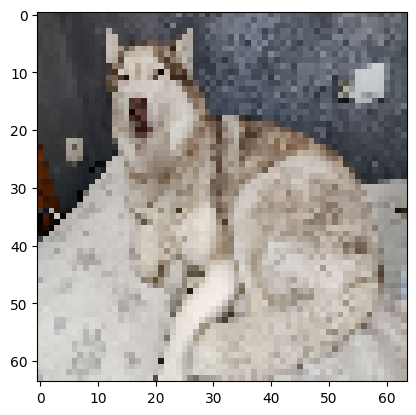

In [8]:
## Particular use case

import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image 


test_image = image.load_img("./Predict/test_1/nyme.jpg", target_size=(64,64))
plt.imshow(test_image)

test_image = image.img_to_array(test_image) # Now with this we make it have 3 channels
test_image = np.expand_dims(test_image, axis=0 ) # Extra batch size for predictors
result = classifier.predict(test_image)
print(result)
print(train_generator.class_indices)
if result[0][0] == 1:
    print("It is a dog")
else:
    print("It is a cat")